In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [20]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [21]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)



KMeans(n_clusters=5)

In [24]:
kmeans_clust.labels_

array([1, 4, 0, 1, 1, 3, 3, 1, 3, 4, 3, 1, 1, 2, 3, 2, 3, 2, 0, 1, 0, 1,
       1, 2, 3])

In [25]:
df_norm.iloc[kmeans_clust.labels_==0,:]
#df_norm.iloc[kmeans_clust.labels_==1,:]
#df_norm.iloc[kmeans_clust.labels_==2,:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
18,0.573171,0.930556,0.342105,0.578947,0.117293,0.366667
20,0.426829,0.513889,0.710526,0.526316,0.123307,0.600000


In [26]:
kmeans_clust.cluster_centers_[0].reshape(1,6).shape
#kmeans_clust.labels_

(1, 6)

In [27]:
Univ["clusterID"]=pd.Series(kmeans_clust.labels_)

result=Univ.iloc[:,1:].groupby(Univ.clusterID).mean()
result


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterID
clusterID,,,,,,,
0,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333,0
1,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667,1
2,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000,2
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429,3
4,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,4


In [28]:
kmeans_clust.cluster_centers_
Univ["clusterID"]=pd.Series(kmeans_clust.labels_)
Univ
kmeans_clust.cluster_centers_[0].shape

(6,)

In [29]:
k = list(range(2,11))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
        
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))
    


TWSS when k is 2 [9.18208121]
TWSS when k is 3 [7.85923615]
TWSS when k is 4 [6.88239516]
TWSS when k is 5 [6.00138182]
TWSS when k is 6 [5.47805617]
TWSS when k is 7 [4.97395045]
TWSS when k is 8 [4.4119327]
TWSS when k is 9 [3.94752975]
TWSS when k is 10 [3.50374835]


Text(0, 0.5, 'total_within_SS')

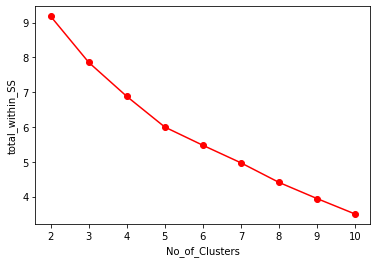

In [30]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

# k- means

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_excel('')